<a href="https://colab.research.google.com/github/Sushmitha-712/bmi-app/blob/main/RegLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# ==============================================================
#
# ---------------------------
# STEP 1: Import Libraries
# ---------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# For clean plots
sns.set_style("whitegrid")

# ---------------------------
# STEP 2: Load Dataset
# ---------------------------
# Replace path if needed (for local/Colab)
data = pd.read_csv('/content/HousingData.csv')

print("First 5 rows of dataset:")
display(data.head())

print("\nDataset Info:")
print(data.info())

print("\nChecking for missing values:")
print(data.isnull().sum())

# ---------------------------
# STEP 3: Handle Missing Values
# ---------------------------
# Fill missing values with column mean
data.fillna(data.mean(), inplace=True)

# ---------------------------
# STEP 4: Define Features (X) and Target (y)
# ---------------------------
# Assuming 'MEDV' (Median Value of homes) is the target
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# ---------------------------
# STEP 5: Split into Train and Test sets
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# STEP 6: Feature Scaling
# ---------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# STEP 7: Train Models
# ---------------------------

# Linear Regression (Baseline)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# ---------------------------
# STEP 8: Model Evaluation
# ---------------------------
models = {
    'Linear Regression': lr,
    'Ridge Regression': ridge,
    'Lasso Regression': lasso
}

results = []
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mse, r2])

results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'R² Score'])
print("\nModel Comparison:")
display(results_df)

# ---------------------------
# STEP 9: Visual Comparison
# -------


First 5 rows of dataset:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None

Checking for missing values:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MED

,Model,MSE,R² Score
0,Linear Regression,25.017672,0.658852
1,Ridge Regression,25.020630,0.658812
2,Lasso Regression,26.139745,0.643551


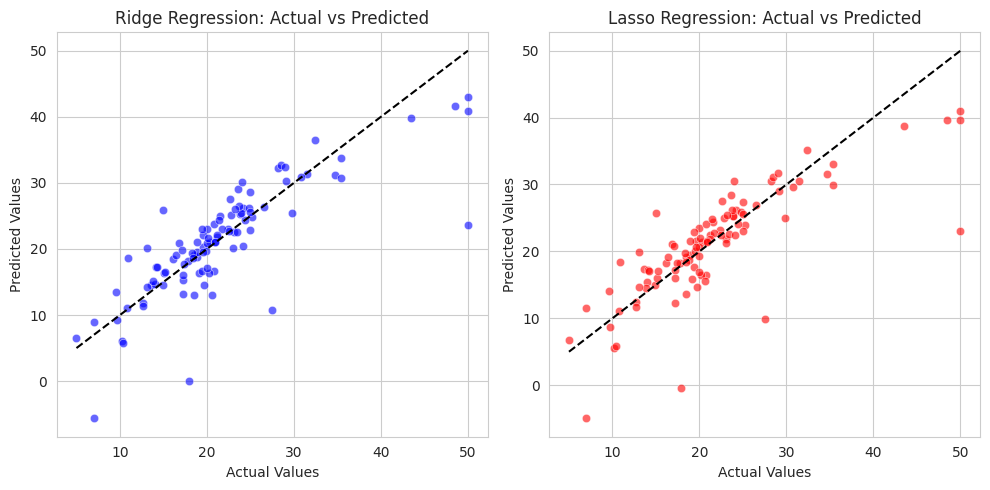

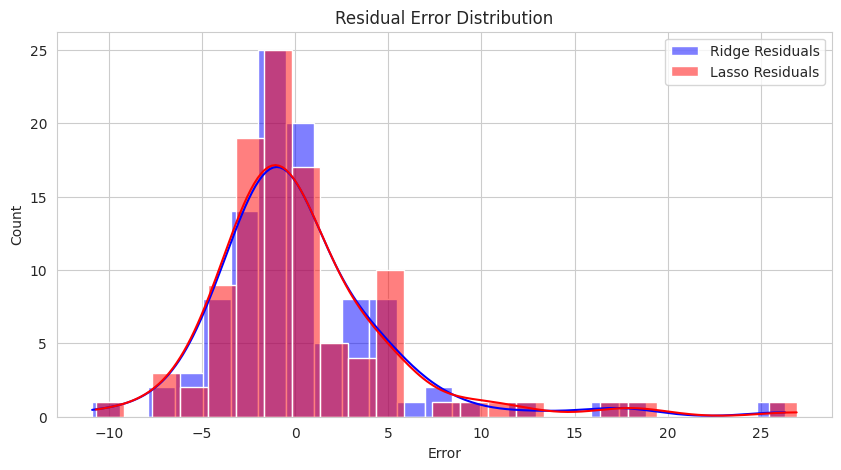

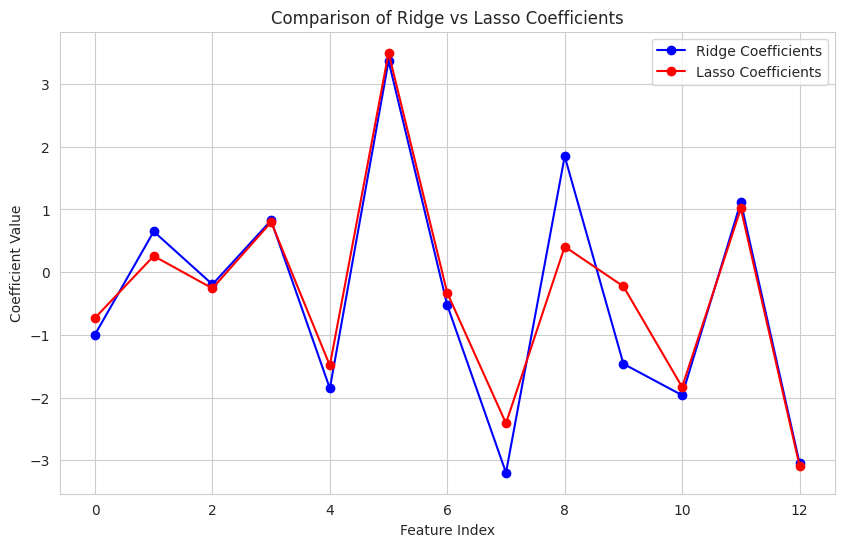

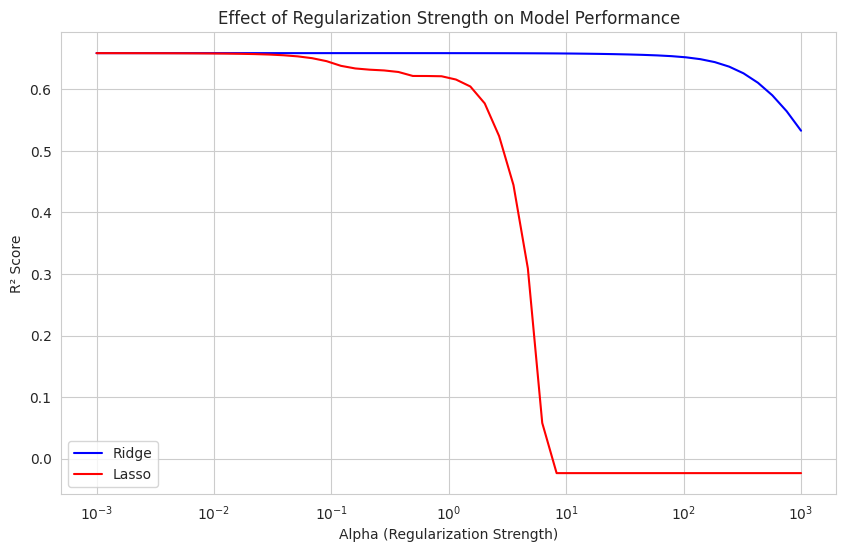

In [5]:
# ==============================================================
# VISUAL COMPARISONS — RIDGE vs LASSO (for HousingData.csv)
# ==============================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# ---------------------------------------
# Generate predictions
# ---------------------------------------
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)

# ---------------------------------------
# 1️⃣ Actual vs Predicted Comparison
# ---------------------------------------
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_ridge, color='blue', alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')

plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred_lasso, color='red', alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')

plt.tight_layout()
plt.show()

# ---------------------------------------
# 2️⃣ Residual Error Distribution
# ---------------------------------------
ridge_residuals = y_test - y_pred_ridge
lasso_residuals = y_test - y_pred_lasso

plt.figure(figsize=(10,5))
sns.histplot(ridge_residuals, bins=25, kde=True, color='blue', label='Ridge Residuals', alpha=0.5)
sns.histplot(lasso_residuals, bins=25, kde=True, color='red', label='Lasso Residuals', alpha=0.5)
plt.title("Residual Error Distribution")
plt.xlabel("Error")
plt.legend()
plt.show()

# ---------------------------------------
# 3️⃣ Coefficient Comparison (Feature Shrinkage)
# ---------------------------------------
ridge_coefs = ridge.coef_
lasso_coefs = lasso.coef_

plt.figure(figsize=(10,6))
plt.plot(range(len(ridge_coefs)), ridge_coefs, 'bo-', label='Ridge Coefficients')
plt.plot(range(len(lasso_coefs)), lasso_coefs, 'ro-', label='Lasso Coefficients')
plt.title("Comparison of Ridge vs Lasso Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.show()

# ---------------------------------------
# 4️⃣ Effect of Regularization Strength (R² vs α)
# ---------------------------------------
alphas = np.logspace(-3, 3, 50)
ridge_scores, lasso_scores = [], []

for a in alphas:
    ridge_temp = Ridge(alpha=a)
    ridge_temp.fit(X_train_scaled, y_train)
    ridge_scores.append(ridge_temp.score(X_test_scaled, y_test))

    lasso_temp = Lasso(alpha=a, max_iter=10000)
    lasso_temp.fit(X_train_scaled, y_train)
    lasso_scores.append(lasso_temp.score(X_test_scaled, y_test))

plt.figure(figsize=(10,6))
plt.plot(alphas, ridge_scores, label='Ridge', color='blue')
plt.plot(alphas, lasso_scores, label='Lasso', color='red')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R² Score')
plt.title('Effect of Regularization Strength on Model Performance')
plt.legend()
plt.show()
